In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('lemonade.csv')

df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


# Exercises

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [29]:
# lower inner fence: Q1 - 1.5*IQR

def get_lower_bound(s, k=1.5):
    q3, q1 = np.percentile(s, [75 ,25])
    iqr = q3 - q1
    return (q1 - (k * iqr)).round(4)

# upper inner fence: Q3 + 1.5*IQR

def get_upper_bound(s, k=1.5):
    q3, q1 = np.percentile(s, [75 ,25])
    iqr = q3 - q1
    return (q3 + (k * iqr)).round(4)

# Combined function

def get_lower_and_upper_bounds(s, k=1.5):
    lower_bound = get_lower_bound(s, k)
    upper_bound = get_upper_bound(s, k)
    return lower_bound, upper_bound

# Create lists of outliers

def make_lower_outlier_list(s, k=1.5):
    lower_outliers = []
    lower_bound, upper_bound = get_lower_and_upper_bounds(s, k)
    for x in s:
        if x < lower_bound:
            lower_outliers.append(x)
    return lower_outliers

def make_upper_outlier_list(s, k=1.5):
    upper_outliers = []
    lower_bound, upper_bound = get_lower_and_upper_bounds(s, k)
    for x in s:
        if x > upper_bound:
            upper_outliers.append(x)
    return upper_outliers

### Using lemonade.csv dataset and focusing on continuous variables:

 - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [30]:
make_lower_outlier_list(df.Temperature)

[15.1]

In [ ]:
# These values make sense, it should be kept

In [31]:
make_lower_outlier_list(df.Rainfall)

[]

In [32]:
make_lower_outlier_list(df.Flyers)

[-38]

In [ ]:
# This value does not make sense, it should not be kept

In [33]:
make_lower_outlier_list(df.Sales)

[]

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [35]:
make_upper_outlier_list(df.Temperature)

[212.0]

In [ ]:
# This value does not make sense, it should not be kept

In [36]:
make_upper_outlier_list(df.Rainfall)

[2.0,
 1.33,
 1.33,
 1.54,
 1.54,
 1.54,
 1.33,
 1.33,
 1.67,
 1.43,
 1.43,
 1.54,
 1.33,
 1.33,
 1.54,
 1.82,
 1.43,
 1.82,
 1.33,
 1.43,
 1.54,
 1.33,
 1.43,
 1.33,
 1.54,
 1.43,
 1.43,
 2.5]

In [ ]:
# These values make sense, they should be kept

In [39]:
make_upper_outlier_list(df.Flyers)

[77, 80]

In [ ]:
# These values make sense, and should be kept

In [38]:
make_upper_outlier_list(df.Sales)

[235, 534, 99, 87]

In [ ]:
# The values > 200 should not be kept

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [41]:
make_lower_outlier_list(df.Temperature, k=3)

[]

In [42]:
make_lower_outlier_list(df.Rainfall, k=3)

[]

In [44]:
make_lower_outlier_list(df.Flyers, k=3)

[-38]

In [45]:
# This value does not make sense, it should not be kept

In [46]:
make_lower_outlier_list(df.Sales, k=3)

[]

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [47]:
make_upper_outlier_list(df.Temperature, k=3)

[212.0]

In [ ]:
# These values should not be kept

In [48]:
make_upper_outlier_list(df.Rainfall, k=3)

[2.0, 1.82, 1.82, 2.5]

In [ ]:
# These values should not be kept

In [49]:
make_upper_outlier_list(df.Flyers, k=3)

[]

In [50]:
make_upper_outlier_list(df.Sales, k=3)

[235, 534, 99, 87]

In [ ]:
# The values > 200 should not be kept

### Identify if any columns in lemonade.csv are normally distributed.

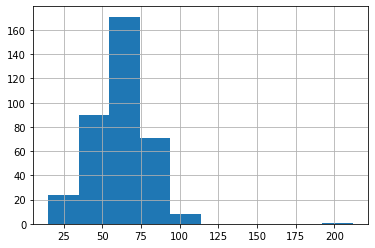

In [51]:
df.Temperature.hist()

In [55]:
df[df.Temperature > 125]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


> Temperature is roughly normally distributed. The temp of 212 is likely an error.

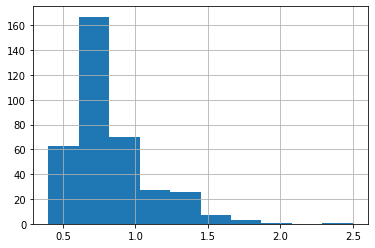

In [52]:
df.Rainfall.hist()

In [56]:
df[df.Rainfall > 2]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


> Rainfall is skewed right. The rainfall of 2.5 is fine, larger than average but it happens

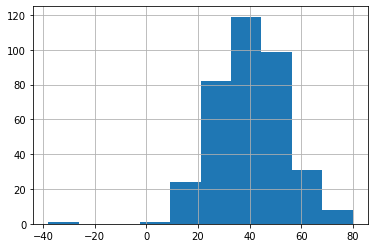

In [53]:
df.Flyers.hist()

> It is impossible to distribute a negative amount of flyers, so anything less than 0 should be dropped.

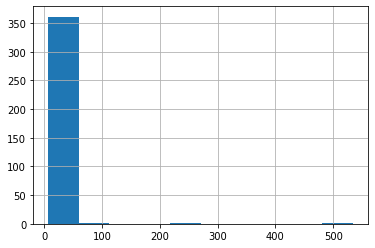

In [54]:
df.Sales.hist()

In [57]:
df[df.Sales > 100]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


> These high sales amounts are likely an error.

In [61]:
get_upper_bound(df.Sales, k=3)

60.0

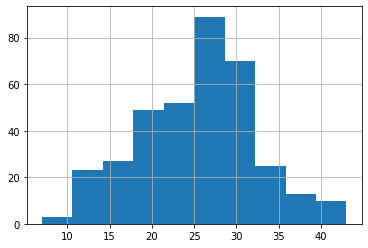

In [62]:
df.Sales[df.Sales < 60].hist()

> Removing the values above the upper bound makes the column normally distributed.

### For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.
Do these make sense?

In [74]:
# lower inner fence: mean - 2sigma

def get_sigma_lower_bound(s, k=2):
    mean = s.mean()
    sigma = s.std()
    return round((mean - (k * sigma)), 4)

# upper inner fence: mean + (2 * sigma)

def get_sigma_upper_bound(s, k=2):
    mean = s.mean()
    sigma = s.std()
    return round((mean + (k * sigma)), 4)

# Combined function

def get_sigma_lower_and_upper_bounds(s, k=2):
    lower_bound = get_2sigma_lower_bound(s, k)
    upper_bound = get_2sigma_upper_bound(s, k)
    return lower_bound, upper_bound

# Create lists of outliers

def make_sigma_lower_outlier_list(s, k=2):
    lower_outliers = []
    lower_bound, upper_bound = get_sigma_lower_and_upper_bounds(s, k)
    for x in s:
        if x < lower_bound:
            lower_outliers.append(x)
    return lower_outliers

def make_sigma_upper_outlier_list(s, k=2):
    upper_outliers = []
    lower_bound, upper_bound = get_sigma_lower_and_upper_bounds(s, k)
    for x in s:
        if x > upper_bound:
            upper_outliers.append(x)
    return upper_outliers

In [75]:
make_sigma_lower_outlier_list(df.Temperature)

[22.0, 15.1]

In [76]:
# These values make sense, they should be kept

In [77]:
make_sigma_lower_outlier_list(df.Rainfall)

[]

In [78]:
make_sigma_lower_outlier_list(df.Flyers)

[-38, 11, 9]

In [79]:
# The negative value does not make sense, it should not be kept. The others are fine

In [80]:
make_sigma_lower_outlier_list(df.Sales)

[]

Should certain outliers be kept or removed?

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [81]:
make_sigma_lower_outlier_list(df.Temperature, k=3)

[22.0, 15.1]

In [ ]:
# These values make sense, they should be kept

In [82]:
make_sigma_lower_outlier_list(df.Rainfall, k=3)

[]

In [83]:
make_sigma_lower_outlier_list(df.Flyers, k=3)

[-38, 11, 9]

In [84]:
# The negative value does not make sense, it should not be kept. The others are fine

In [85]:
make_sigma_lower_outlier_list(df.Sales, k=3)

[]

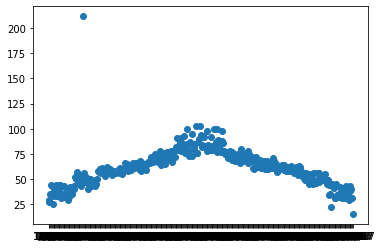

In [86]:
plt.scatter(df.Date, df.Temperature)

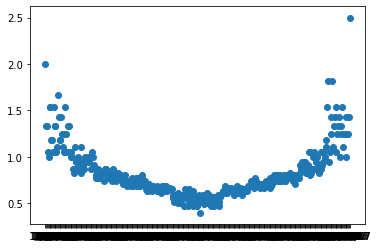

In [87]:
plt.scatter(df.Date, df.Rainfall)

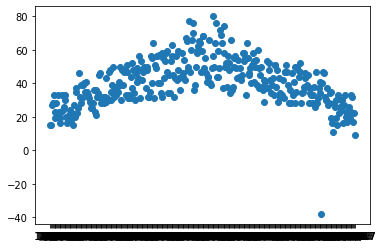

In [88]:
plt.scatter(df.Date, df.Flyers)

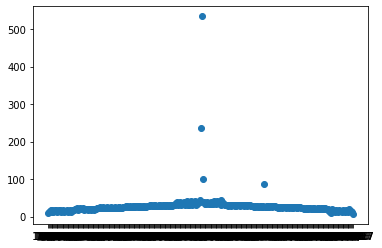

In [89]:
plt.scatter(df.Date, df.Sales)